In [230]:
import os 
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline

In [220]:
cases = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
coverages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
results = []
for case in cases: 
    for coverage in coverages:
               
        # Non-VNTR data
        non_vntr_data = pd.read_table(
            '../output/pipeline/sample/sequence_10000_case_{0}/coverage_{1}/sequence_10000_case_{0}.non_vntr.depth'.format(case, coverage), header=None)
        non_vntr_data.columns = ['chrom', 'pos', 'depth']
        non_vntr_data = non_vntr_data[non_vntr_data['depth'] > coverage/8]
        non_vntr_coverage = non_vntr_data.depth.mean()

        # VNTR data
        vntr_data = pd.read_table(
            '../output/pipeline/sample/sequence_10000_case_{0}/coverage_{1}/sequence_10000_case_{0}.vntr.depth'.format(case, coverage), header=None)
        vntr_data.columns = ['chrom', 'pos', 'depth']
        
        vntr_summary = vntr_data.depth.describe()
        quarter_depth = summary['25%']
        vntr_data = vntr_data[vntr_data['depth'] > coverage/8]
        vntr_coverage = vntr_data.depth.mean()
        
        # Total data 
        total = pd.concat([vntr_data, non_vntr_data])
        total_coverage = total.depth.mean()
        
        # Results 
        copy_number = vntr_coverage / non_vntr_coverage
        results.append(['sequence_10000_case_{0}'.format(case), coverage, copy_number, vntr_coverage, non_vntr_coverage, total_coverage])
results = pd.DataFrame(results, columns=['Sample Name', 'Coverage', 'Predicted Copy Number', 'VNTR Coverage', 'Non-VNTR Coverage', 'Total Coverage'])

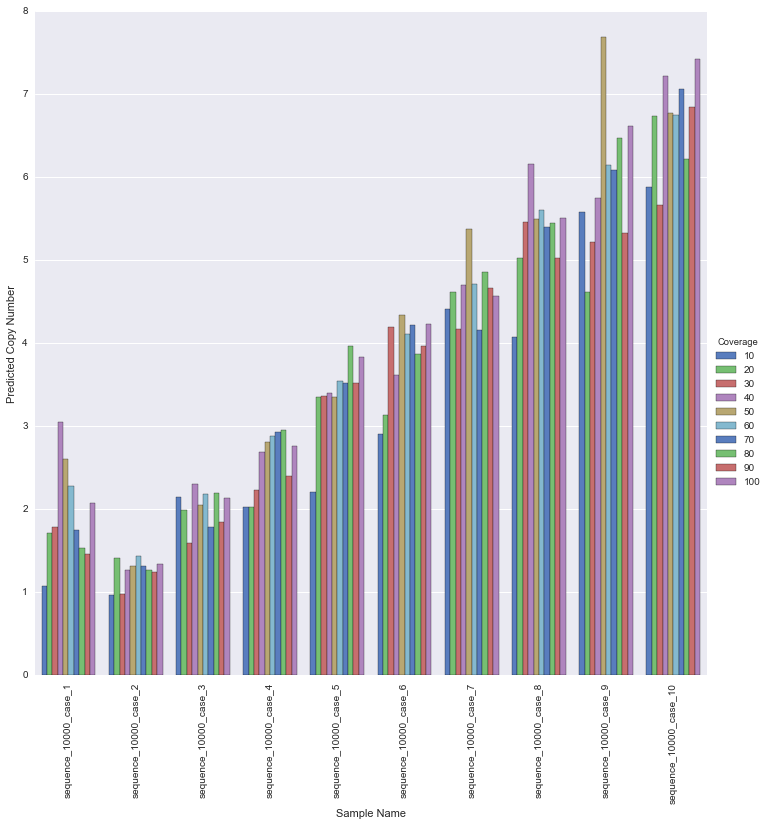

In [221]:
fig = plt.figure(figsize=(20, 20))
fg = sns.factorplot(x='Sample Name', y='Predicted Copy Number', hue='Coverage', data = results, kind='bar', size=10, palette='muted')
for xtick in fg.ax.get_xticklabels():
    xtick.set_rotation(90)

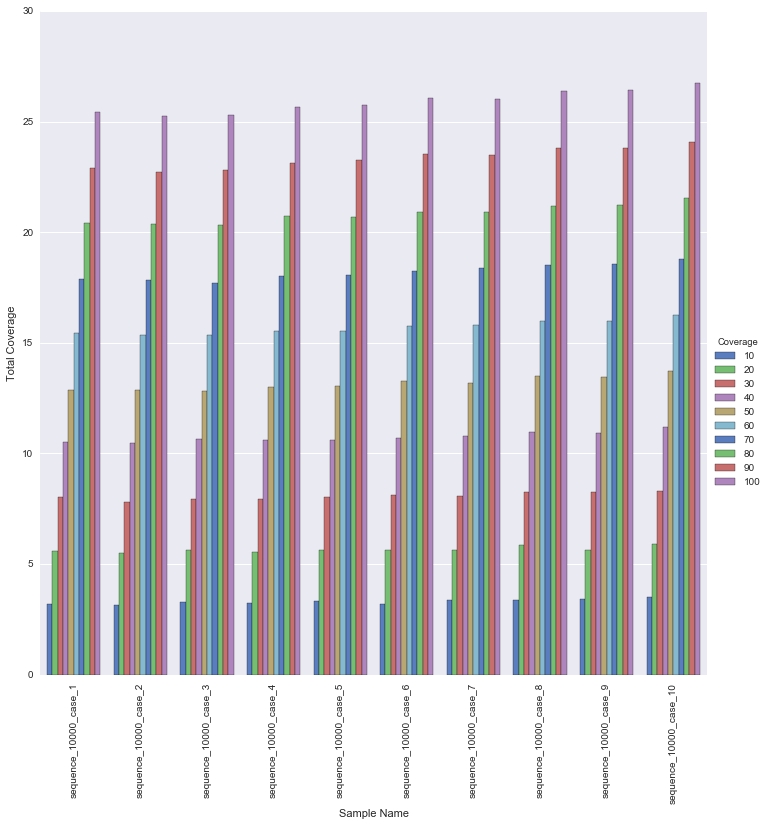

In [222]:
fig = plt.figure(figsize=(20, 20))
fg = sns.factorplot(x='Sample Name', y='Total Coverage', hue='Coverage', data = results, kind='bar', size=10, palette='muted')
for xtick in fg.ax.get_xticklabels():
    xtick.set_rotation(90)

In [223]:
results['True Copy Number'] = results['Sample Name'].str.extract('([0-9]*$)')

In [224]:
results

,Sample Name,Coverage,Predicted Copy Number,VNTR Coverage,Non-VNTR Coverage,Total Coverage,True Copy Number
0,sequence_10000_case_1,10,1.073671,3.445312,3.208908,3.209957,1
1,sequence_10000_case_1,20,1.706043,9.560000,5.603610,5.612299,1
2,sequence_10000_case_1,30,1.776618,14.208000,7.997218,8.018527,1
3,sequence_10000_case_1,40,3.047463,31.907692,10.470249,10.507599,1
4,sequence_10000_case_1,50,2.598162,33.368421,12.843089,12.883735,1
5,sequence_10000_case_1,60,2.276725,35.027523,15.385050,15.440637,1
6,sequence_10000_case_1,70,1.740090,31.052083,17.845101,17.877633,1
7,sequence_10000_case_1,80,1.527784,31.154639,20.392043,20.418791,1
8,sequence_10000_case_1,90,1.449724,33.161972,22.874686,22.911993,1
9,sequence_10000_case_1,100,2.070582,52.560000,25.384166,25.453547,1


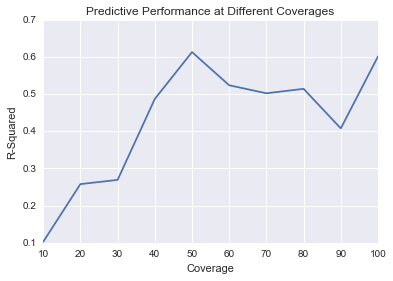

In [285]:
gcovs = results.groupby('Coverage')
r2_results = []
for coverage, cov_df in gcovs: 
    r2 = r2_score(cov_df['True Copy Number'], cov_df['Predicted Copy Number'])
    r2_results.append([coverage, r2])
r2_results = pd.DataFrame(r2_results, columns=['Coverage', 'R2'])

fig = plt.figure()
plt.plot(r2_results['Coverage'], r2_results['R2'])
ax = fig.get_axes()[0]
ax.set_xlabel('Coverage')
ax.set_ylabel('R-Squared')
ax.set_title('Predictive Performance at Different Coverages')

In [272]:
# Mean prediction by coverage 
mean_preds = gcovs['Predicted Copy Number'].mean().to_frame()
mean_preds['True Copy Number'] = [int(x) for x in mean_preds.index.str.extract('([0-9]*$)')]
mean_preds.sort_values('True Copy Number', inplace=True)
r2 = r2_score(mean_preds['True Copy Number'], mean_preds['Predicted Copy Number'])

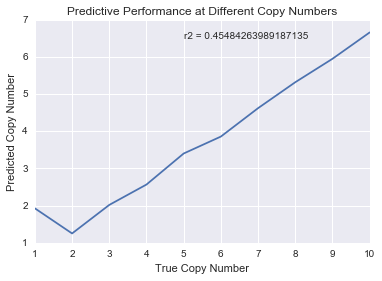

In [284]:
fig = plt.figure()
plt.plot(mean_preds['True Copy Number'], mean_preds['Predicted Copy Number'])
ax = fig.get_axes()[0]
ax.set_xlabel('True Copy Number')
ax.set_ylabel('Predicted Copy Number')
ax.text(x = 5, y = 6.5, s= 'r2 = 0.45484263989187135')
ax.set_title('Predictive Performance at Different Copy Numbers')